In [ ]:
#ALEXANDER DANIEL ROMAN GABRIEL

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Credit_Scoring.xlsx')
df.head()

,Edad,Ingresos,Tarjetas_de_Credito,Educación,Prestamo_Vehicular,Valoracion_Credito
0,36.22,2,2,2,2,0
1,21.99,2,2,2,2,0
2,29.17,1,2,1,2,0
3,32.75,1,2,2,1,1
4,36.77,2,2,2,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 2464 non-null   float64
 1   Ingresos             2464 non-null   int64  
 2   Tarjetas_de_Credito  2464 non-null   int64  
 3   Educación            2464 non-null   int64  
 4   Prestamo_Vehicular   2464 non-null   int64  
 5   Valoracion_Credito   2464 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 115.6 KB


In [ ]:
df.columns

Index(['Edad', 'Ingresos', 'Tarjetas_de_Credito', 'Educación',
       'Prestamo_Vehicular', 'Valoracion_Credito'],
      dtype='object')

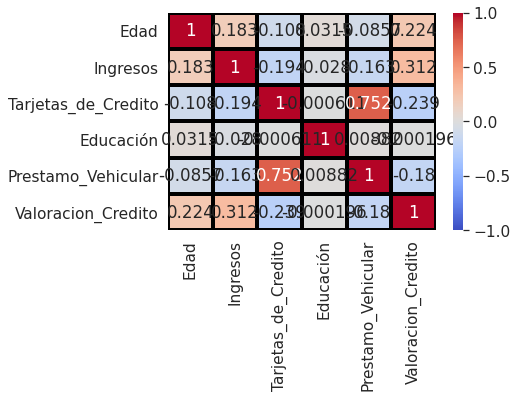

In [ ]:
#Correlation
sns.heatmap(df.corr() , annot = True , fmt = '.3g' , vmin = -1 , vmax = 1 , cmap = 'coolwarm' ,
            linewidths=3, linecolor='black')

In [ ]:
from sklearn.linear_model import LogisticRegression

x = df[['Edad', 'Ingresos', 'Tarjetas_de_Credito', 'Educación',
       'Prestamo_Vehicular']]

y = df['Valoracion_Credito']

algoritmo = LogisticRegression()

algoritmo.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
credit_pred = algoritmo.predict(x)
df['credit_prediction'] = credit_pred
df.head()

,Edad,Ingresos,Tarjetas_de_Credito,Educación,Prestamo_Vehicular,Valoracion_Credito,credit_prediction
0,36.22,2,2,2,2,0,1
1,21.99,2,2,2,2,0,0
2,29.17,1,2,1,2,0,0
3,32.75,1,2,2,1,1,0
4,36.77,2,2,2,2,1,1


In [ ]:
#Matriz de confusion

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y , credit_pred)
df_cm = pd.DataFrame(matriz, range(2), range(2))


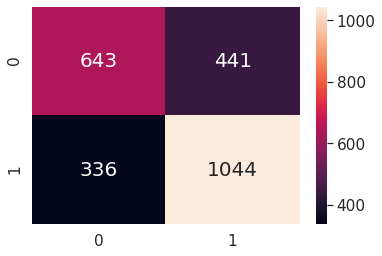

In [ ]:
#Visualizar la matriz de confusion
sns.set(font_scale= 1.4)
sns.heatmap(df_cm , annot = True , annot_kws= {"size" : 20} , fmt = '.4g') #font size

In [ ]:
#Precision del modelo
from sklearn.metrics import precision_score

precision = precision_score(y , credit_pred)
precision

0.703030303030303

In [ ]:
#Exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y , credit_pred)
exactitud #CA

0.6846590909090909

In [ ]:
#recall
from sklearn.metrics import recall_score

sensibilidad = recall_score(y , credit_pred)
sensibilidad

0.7565217391304347

In [ ]:
#Calculo F1

from sklearn.metrics import f1_score
puntajef1 = f1_score(y , credit_pred)
puntajef1

0.7287958115183246

In [ ]:
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y , credit_pred)
roc_auc #AUC -> AREA UNDER CURVE of a ROC curve

0.6748475854323761